## Rainfall Trend Analysis.

## Library Imports:
- ### Pandas (pd) : Data Manipulation and Analysis library
    - Used for  and managing Data Frames
    - It provides powerful data structures and analysis tools.

- ### numpy (np): Numerical Computing library
    - Used for mathematical operations
    - Provides array manipulation and mathematical functions

- ### matplotlib.pyplot (plt): Plotting library
    - It creates visualizations and graphs
    - Helps in data visualization

- ### scipy.stats : Statistical fucntions library
    - It provides linear regression and statistical testing capabilities. 

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Data Preparation
- In the code cells below we:
    - Create a dictionary with rainfall data
    - Convert dictionary to a pandas DataFrame
    - Finally set 'Year' as the index for easy time-series analysis

In [3]:
# rainfall data
rainfall_data = {
    'Year': [2015, 2016, 2017, 2018,2019, 2020, 2021, 2022, 2023, 2024],
    'March':[85, 90, 80, 95, 88, 92, 86, 89, 91, 87],
    'April':[140, 150, 130, 160, 145, 155, 138, 142, 148, 140],
    'May':[110, 115, 105, 120, 112, 118, 108, 111, 114, 109],
    'October':[50, 55, 45, 60, 52, 58, 48, 50, 53, 47],
    'November':[120, 125, 115, 130, 118, 122, 110, 115, 120, 112],
    'December':[70, 75, 65, 80, 72, 78, 68, 70, 73, 67]
}

In [4]:
#creating the dataframe
df = pd.DataFrame(rainfall_data)
df.set_index('Year', inplace=True)

## Descriptive Statitics:
- ### The pandas' `describe()` method provides key statistical measures i.e.,
    - Count of data points
    - Mean
    - Standard deviation
    - Minimum value
    - 25th percentile
    - 50th percentile (median)
    - 75th percentile
    - Maximum value

In [5]:
# Descriptive Statisics 
df.describe()

,March,April,May,October,November,December
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,88.300000,144.800000,112.200000,51.800000,118.700000,71.800000
std,4.164666,8.766096,4.613988,4.802777,6.056218,4.802777
min,80.000000,130.000000,105.000000,45.000000,110.000000,65.000000
25%,86.250000,140.000000,109.250000,48.500000,115.000000,68.500000
50%,88.500000,143.500000,111.500000,51.000000,119.000000,71.000000
75%,90.750000,149.500000,114.750000,54.500000,121.500000,74.500000
max,95.000000,160.000000,120.000000,60.000000,130.000000,80.000000


In [6]:
# trend analysis

trend_results = {}

for column in df.columns:
    x = df.index.values.reshape(-1,1)
    y = df[column].values
    
    # preforming linear regressin
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.ravel(), y)
    
    trend_results[column] = {
        'Slope': slope,
        'R-squared': r_value**2,
        'p-value': p_value,
        'Trend': 'Increasing' if slope > 0 else 'Decreasing'
    }

In [7]:
# Trend Analysis
#trend_results = analyze_rainfall_trend(dataframe)
for month, results in trend_results.items():
    print(f"\n{month} Rainfall Trend:")
    for key, value in results.items():
        print(f"  {key}: {value}")


March Rainfall Trend:
  Slope: 0.28484848484848485
  R-squared: 0.04288237920524915
  p-value: 0.5659417064775493
  Trend: Increasing

April Rainfall Trend:
  Slope: -0.06060606060606061
  R-squared: 0.0004381583328951751
  p-value: 0.954230800359205
  Trend: Decreasing

May Rainfall Trend:
  Slope: -0.09696969696969697
  R-squared: 0.004048839121908016
  p-value: 0.8613705024863393
  Trend: Decreasing

October Rainfall Trend:
  Slope: -0.2787878787878788
  R-squared: 0.03088690371927367
  p-value: 0.6272099917296525
  Trend: Decreasing

November Rainfall Trend:
  Slope: -0.9878787878787879
  R-squared: 0.2439022151230574
  p-value: 0.14684494160177852
  Trend: Decreasing

December Rainfall Trend:
  Slope: -0.2787878787878788
  R-squared: 0.03088690371927367
  p-value: 0.6272099917296525
  Trend: Decreasing


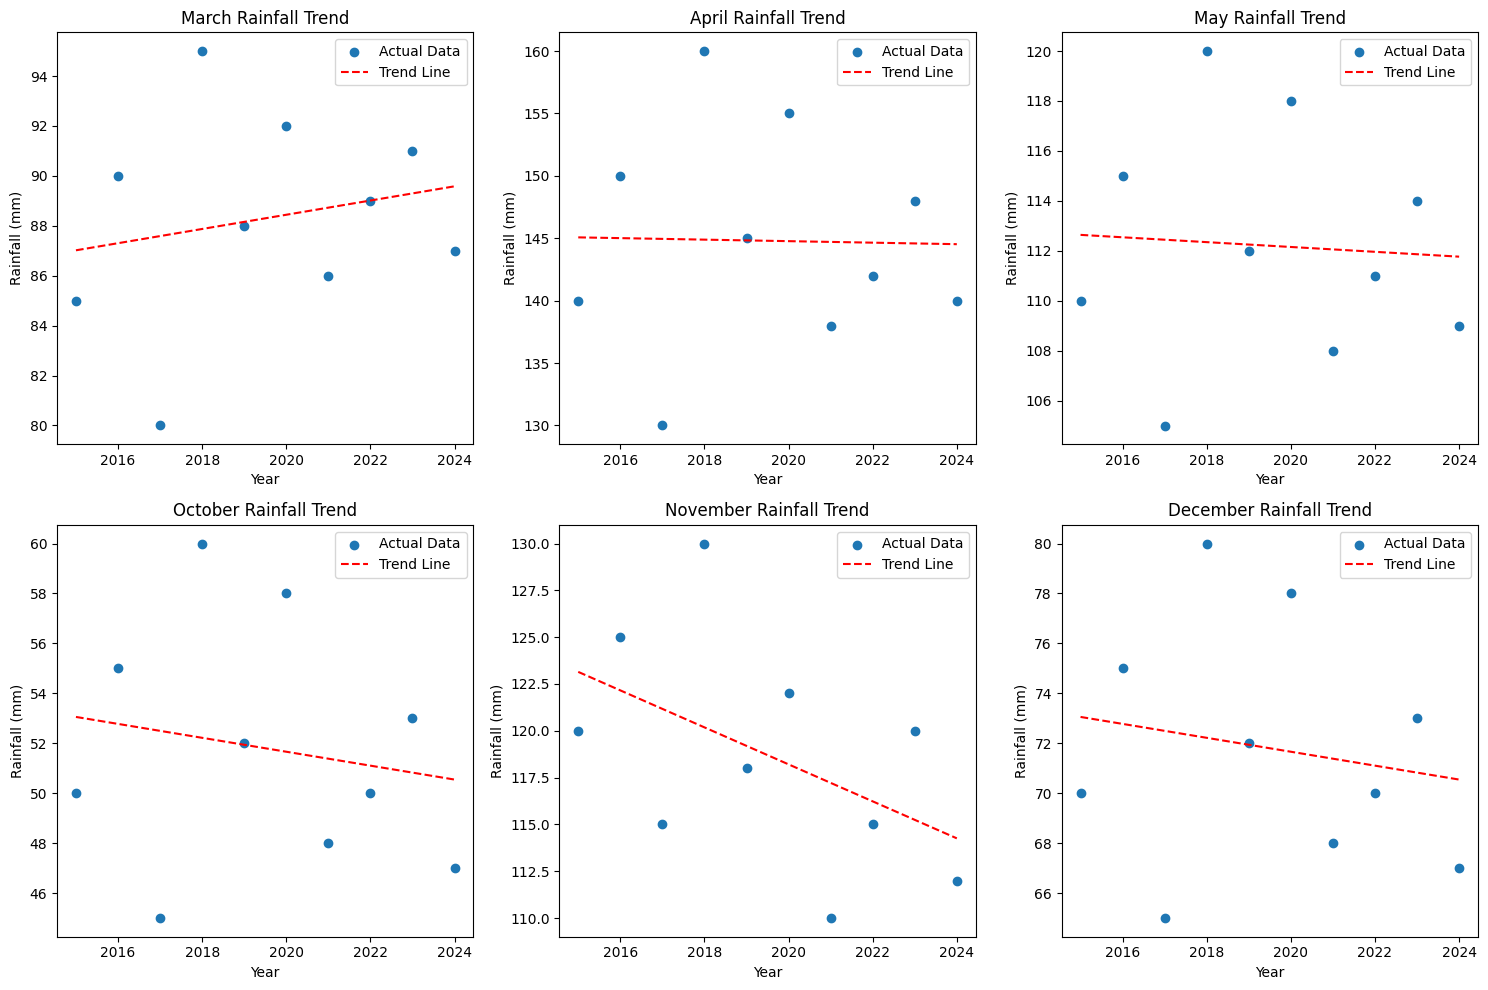

In [7]:
# visualization
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    
    # scatter plot of actual data
    plt.scatter(df.index, df[column], label = 'Actual Data')
    
    # Trend line
    z = np.polyfit(df.index, df[column], 1)
    p = np.poly1d(z)
    plt.plot(df.index, p(df.index), "r--", label = 'Trend Line')
    
    plt.title(f'{column} Rainfall Trend')
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# future prediction
years_to_predict = 3
predictions = {}
last_year = df.index.max()

for column in df.columns:
    # linear regression
    x = df.index.values.reshape(-1,1)
    y = df[column].values
    
    # fitting the linear regression model
    slope, intercept, _, _, _ = stats.linregress(x.ravel(), y)
    
    # predicting future years
    future_years = np.arange(last_year + 1, last_year + years_to_predict + 1)
    future_predictions = slope * future_years + intercept
    
    predictions[column] = dict(zip(future_years, future_predictions))
    

In [12]:
  # Future Predictions
print("\n3. Future Rainfall Predictions:")
for month, year_predictions in predictions.items():
    print(f"\n{month} Rainfall Predictions:")
    for year, prediction in year_predictions.items():
        print(f"  {year}: {prediction:.2f} mm")


3. Future Rainfall Predictions:

March Rainfall Predictions:
  2025: 89.87 mm
  2026: 90.15 mm
  2027: 90.44 mm

April Rainfall Predictions:
  2025: 144.47 mm
  2026: 144.41 mm
  2027: 144.35 mm

May Rainfall Predictions:
  2025: 111.67 mm
  2026: 111.57 mm
  2027: 111.47 mm

October Rainfall Predictions:
  2025: 50.27 mm
  2026: 49.99 mm
  2027: 49.71 mm

November Rainfall Predictions:
  2025: 113.27 mm
  2026: 112.28 mm
  2027: 111.29 mm

December Rainfall Predictions:
  2025: 70.27 mm
  2026: 69.99 mm
  2027: 69.71 mm
